# Code, Build, and Test

# Expectations:

Better understanding of AWS CodeCommit  
Better understanding of AWS CodeBuild  
Better understanding of AWS SAM  
Better understanding of AWS Pipeline

# DevOps on AWS

DevOps is not the same as Infrastructure as Code, or Agile or Automated Testing and Delivery

DevOps is a way for **development teams** and **operations teams** to work better together and ultimate share the responsibility for the software they build

Cultural philosophies:

* Increasing collaboration, transparency, and communication
* Taking on responsibilities outside the scope of you current position
* Define expectaions for job roles and collaboration

DevOps has started to distill around these tools and practices:

Perform frequent but small updates to an application
Full Automation
Practicing CI/CD

## Code:

The answers to the following questions may vary, but there may be some best practices to work around. The following are potential answers to the issue within the AWS infrastructure

Questions to Ask:

* Where is the code? AWS CodeCommit (Git Repository)

* Where should I be committing updates? Create feature branches before merging into main branch

* How often should I be committing and integrating? Frequently (frequent small updates philosophy)

* Where do changes get deployed for end users? Frequently (frequent small updates philosophy)


**[Exercise 1: Setting Up Your Development Environment](https://aws-tc-largeobjects.s3.us-west-2.amazonaws.com/DEV-AWS-MO-DevOps-C1/exercise-1.html)**

Pulls already existing files and configurations on your "local" Cloud9 environment and pushes to S3 for hosting the application

AWS SAM: Serverless Application Model. Think of using docker compose yamls for serverless application installation

Note: A lot of the instructions are outdated in granting permission to S3 in order to access view the web application. You will need to configure permissions on the S3 bucket.

## Build

**The Build:**

A build is going to take your source, compile it, retrieve dependency packages from a repository:

* Node Package Manager
* Java Maven Artifact

The output of the build will be a packaged artifact ready for a deployment:

* Linux RPM
* JAVA WAR
* Docker Image
* Windows MSI Installer

Builds include Automated Testing and Unit Testing (and automated Unit Testing)
There should be tesing before every commit for Continuous Integration

AWS Codebuild Service can be used to compile source, run tests, and create deployment packages

To use CodeBuild you will need to configure the Build Project and buildspec file

Build Project:

* Source
* Environment
* IAM role: authentication between services
* Logging: Can write logs to CloudWatch logs and S3



**Branching Strategies**

A branch in Git is just a pointer to a commit. That's it!

Branches form DAGs

How many people in the team and are working separately on new features will make coordination more complex during merge time

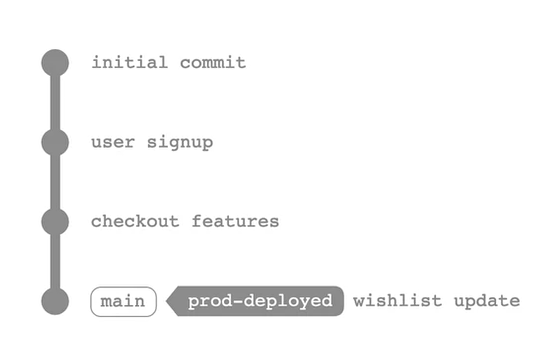

The commit that is deployed is tagged to keep everyone on track with the production

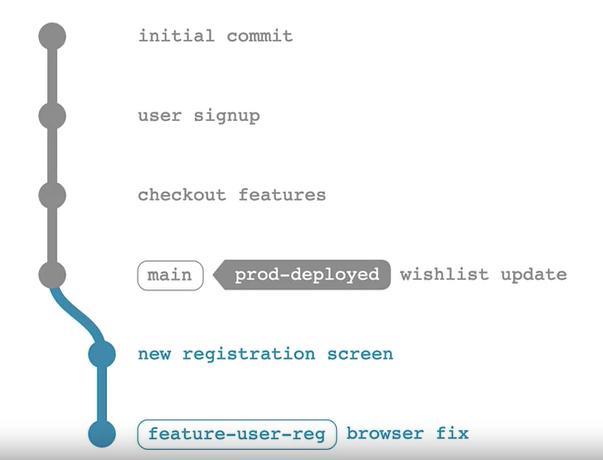

A feature branch has been created. A pull request will be created for others to review the new feature.

**Fast Forward Merge**

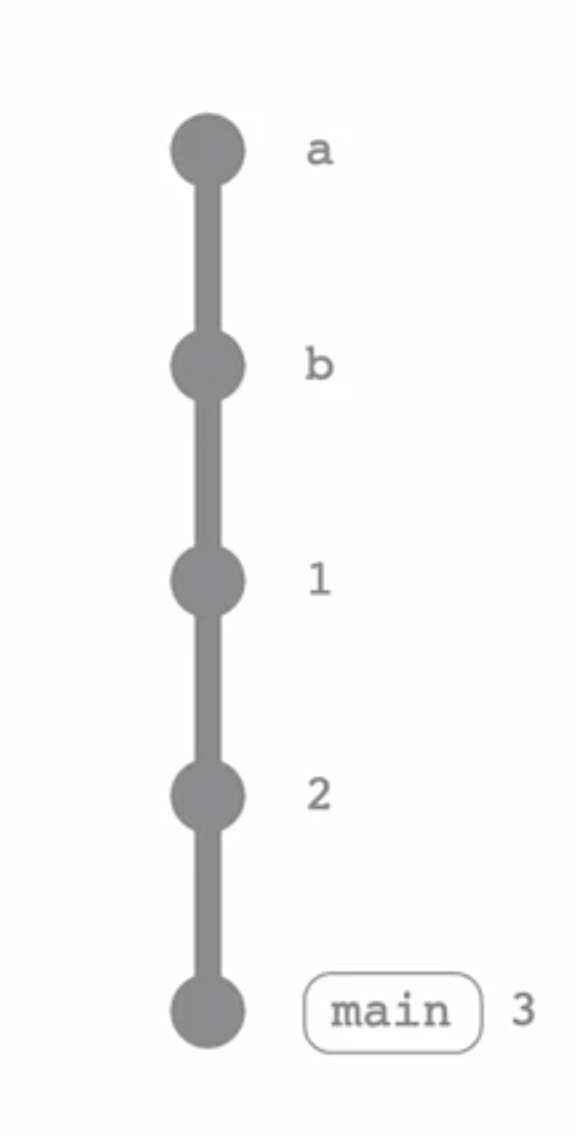

There was just one commit since the branching

**Squash and Merge**

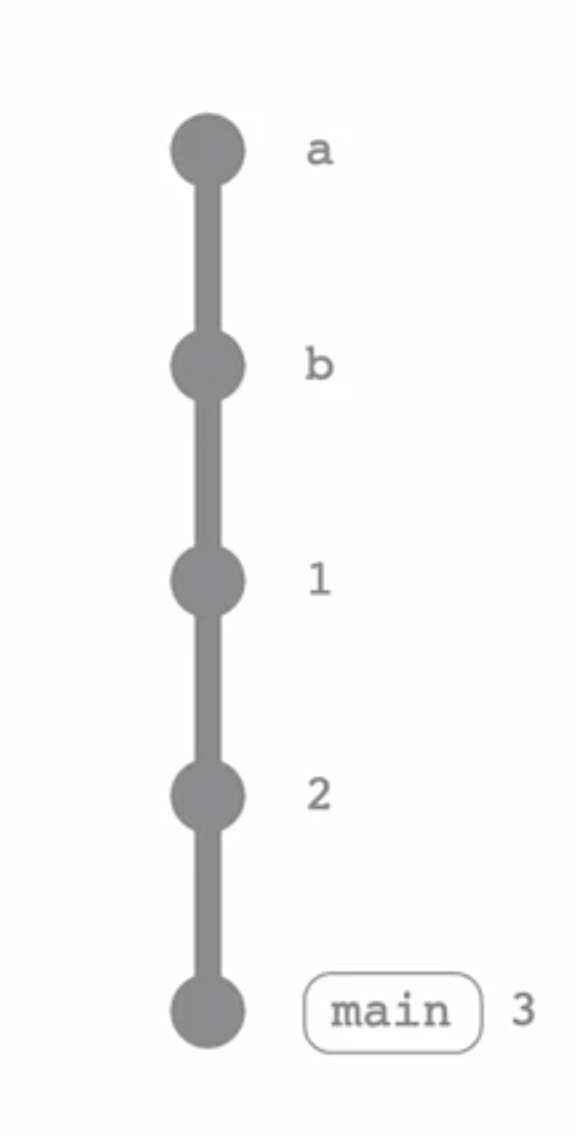

Combines multiple branch commit to the main. Will Delete source branch

**3 Way Merge**

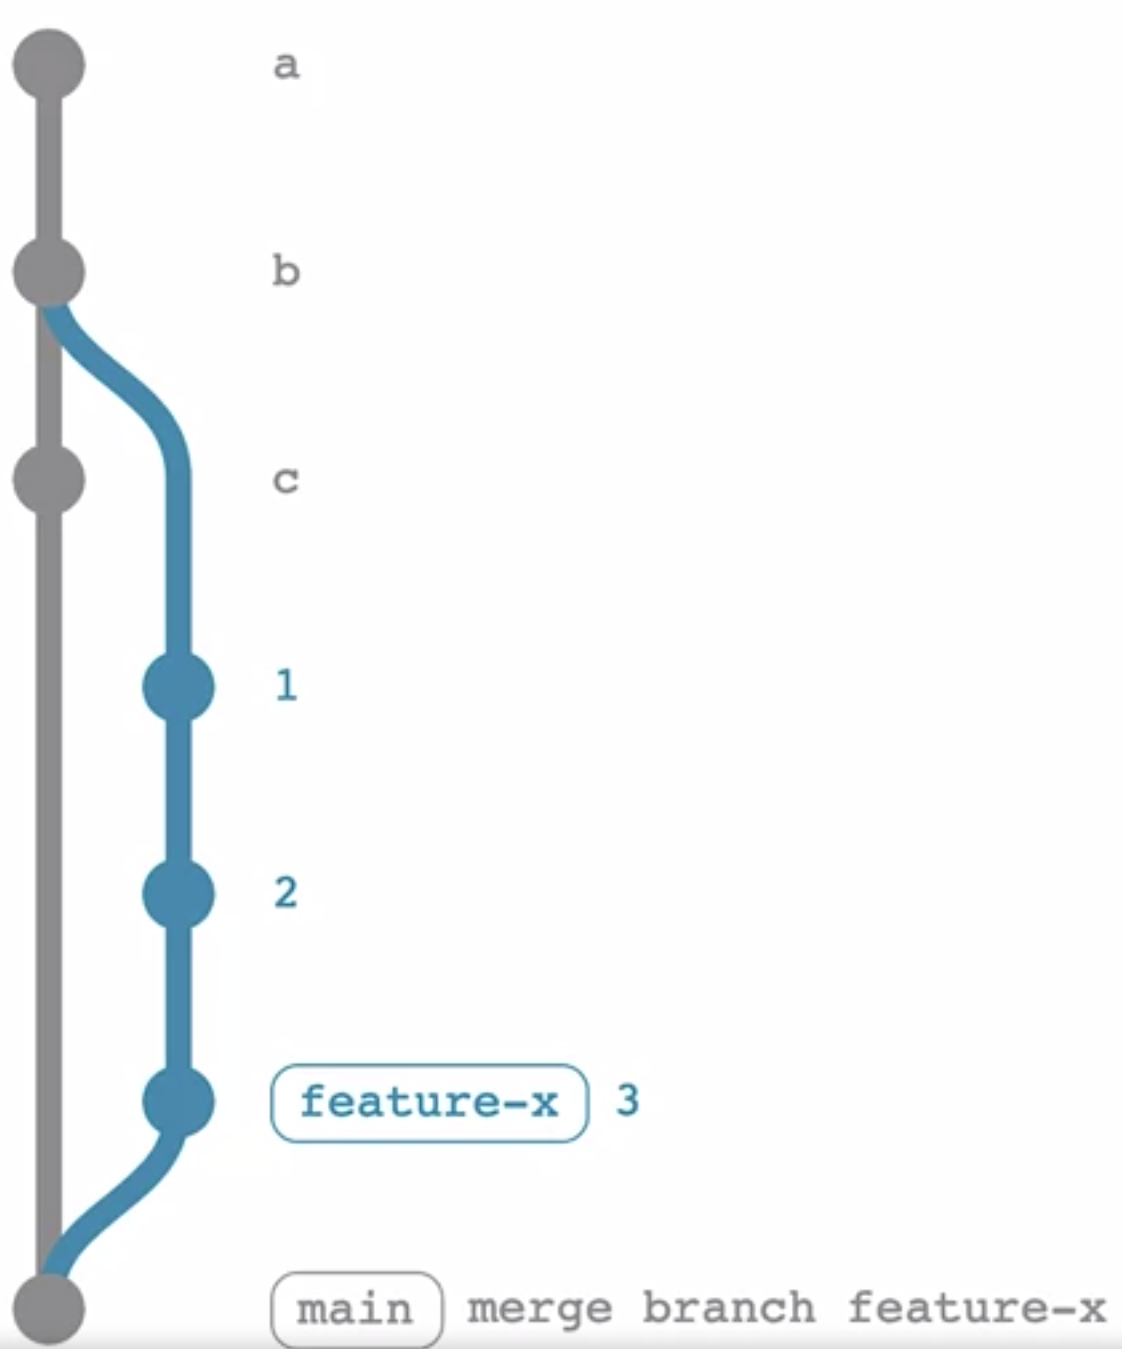

Combines new commits from main and branch together into new main

**Rebasing to Main**

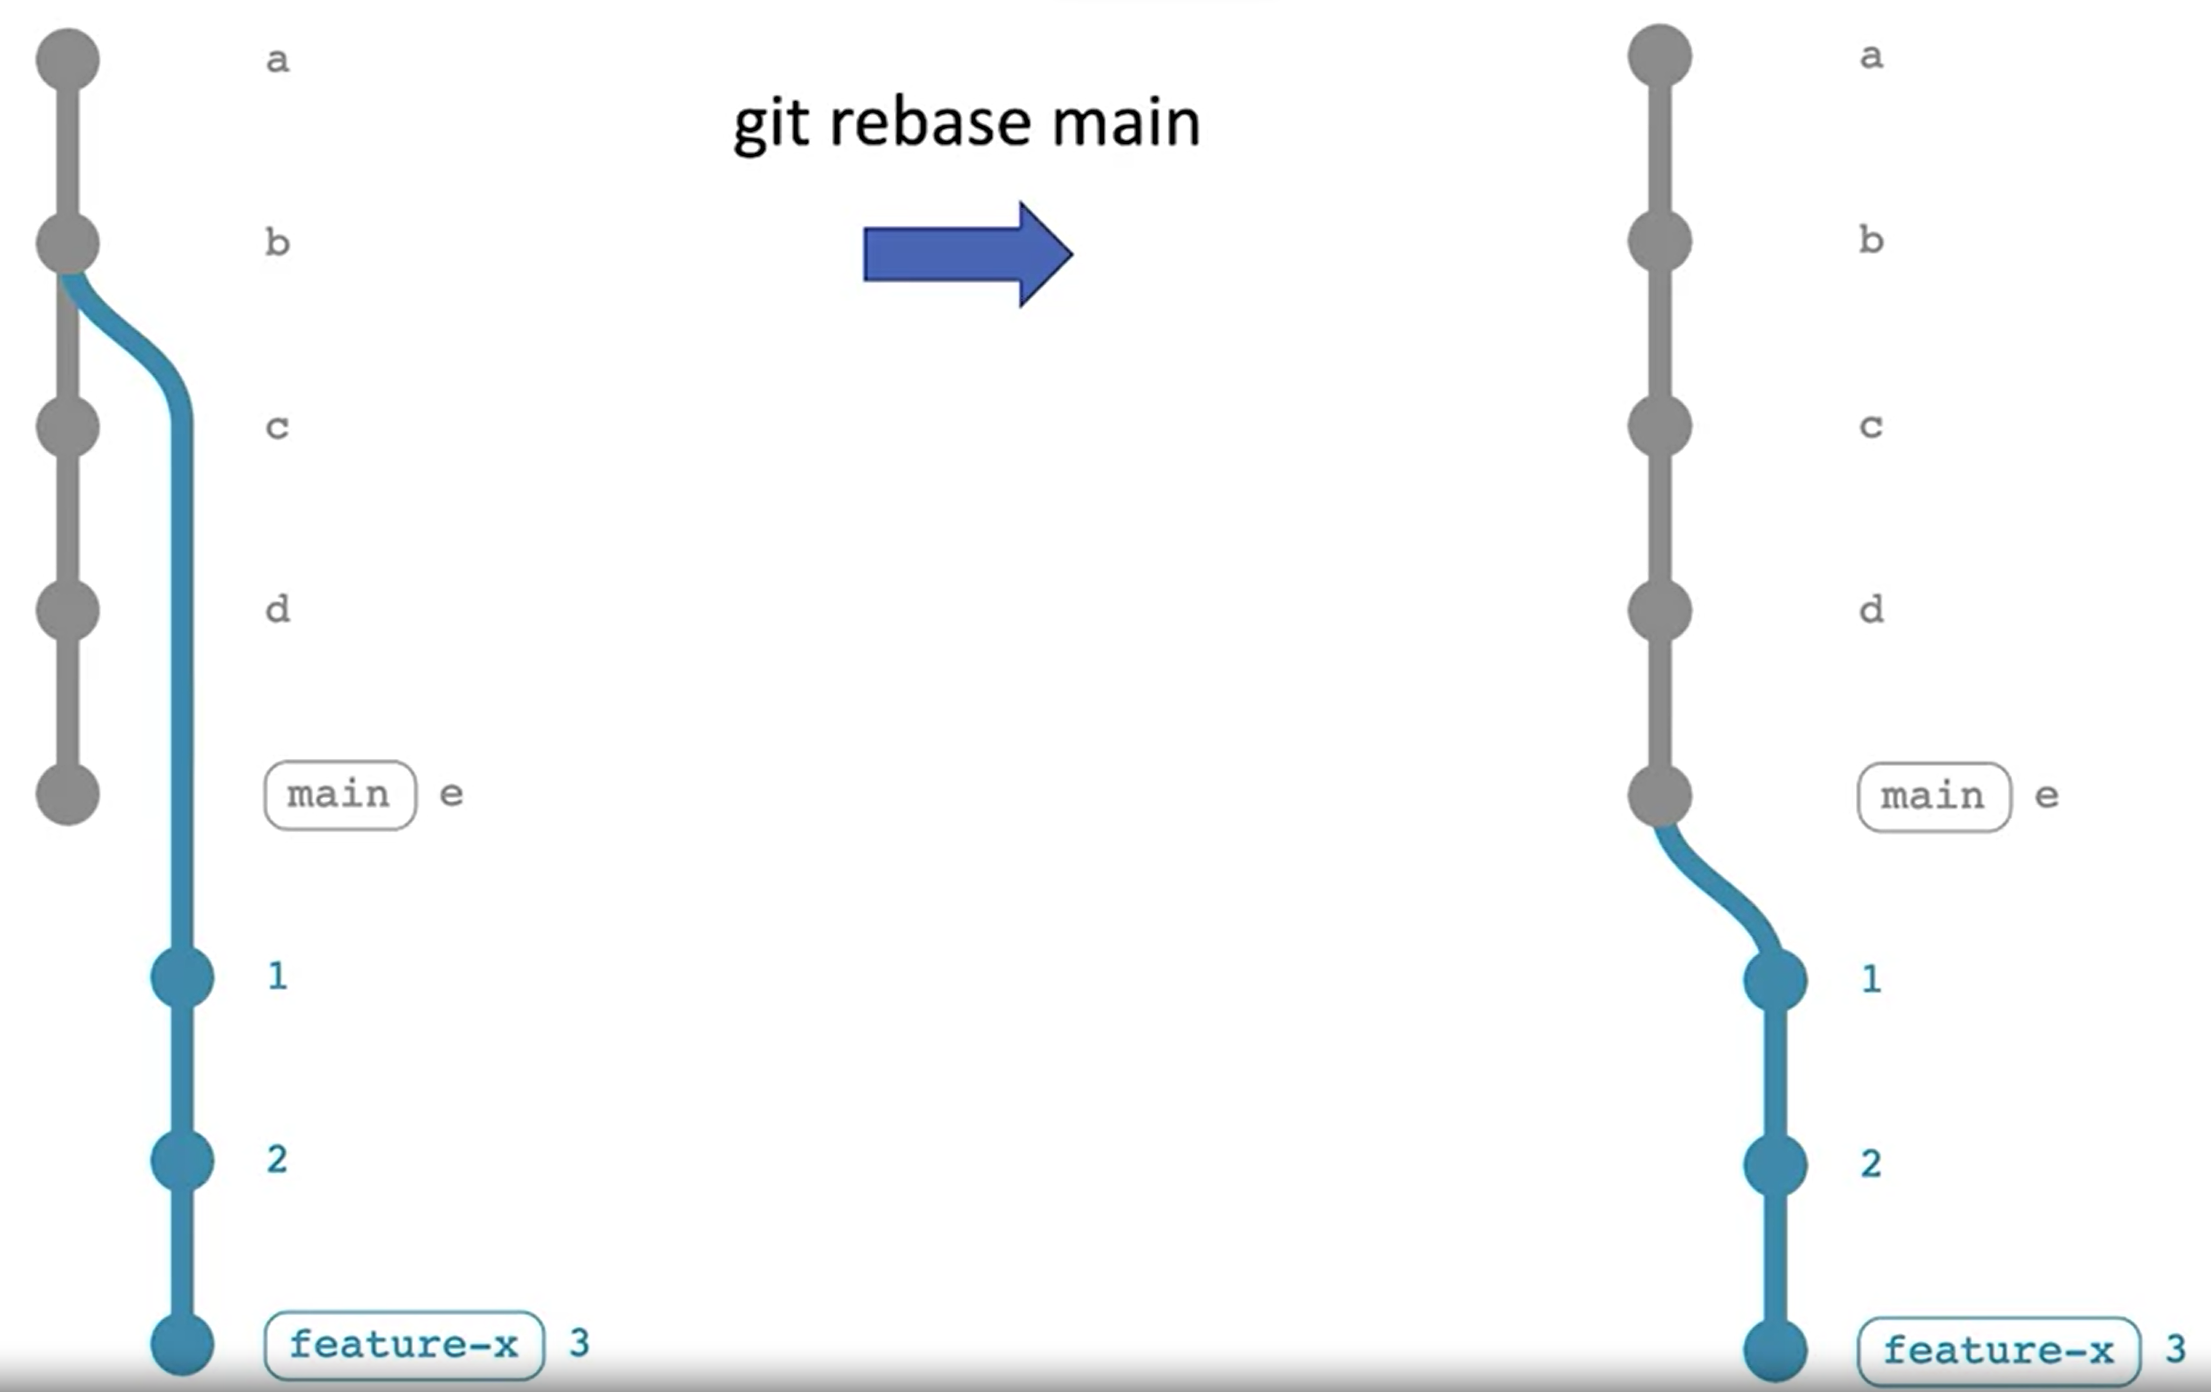

Several commits on the main branch have already happened by the time you want to merge your feature branch back

## Testing

Consider creating a feature that calculates tax all over the world. There would be a lot of variables that would control the appropriate amount to tax someone.

If there were any issues in the code that was not caught in time in testing. There would be a lot of costs if it made it into production:

* Issues refunds, or asking for more money to pay the appropriate taxes (or eating the costs
* Upset Customers, leading to loss of future revenue
* Amend tax documentation
* Unplanned resouces to fix issues

**Types of Testing:**

Regression Testing: older features when new features/changes are planned to enter production to ensure they are still working properly

Unit Testing: Testing of a stand alone part of the application

Integration Testing: Testing that multiple modules work together



[**Exercise 2: Testing the Application**](https://aws-tc-largeobjects.s3.us-west-2.amazonaws.com/DEV-AWS-MO-DevOps-C1/exercise-2.html)

No notes on the exercise itself, everything worked as expected

Note that though this step has automated testing, we are manually running those tests through command line

**Automate Testing:**

Parts of what is happening in the Automate Testing Video are happening very quickly, and took a very watches to comprehend.

The example is using a very simple "hello world" go program in CodeBuild

1. Testing the code "locally" inside the cloud9 instance. Reports are output as a human readable html file


In [ ]:
uses linting and pytest. Output is logged as an html report for human readability

#!/bin/bash
pylint back-end-python/gameactions/app.py
pytest back-end-python/tests/unit --cov-report=html --cov=gameactions --cov-branch


2. A buildspec file in yaml form configures all the requirements needed for different phases of the build, including:
 * install
 * build
 * reports

 The reports specifies the output of tests be in xml form because this will be for CodeBuild

 CodeBuild also supports
 * Cucumber
 * JUnit
 * NUnit: What Code below uses



In [ ]:
The example buildspec file for unit testing

version: 0.2


phases:
  install:
    commands:
      - pip3 install -U -r back-end-python/gameactions/requirements.txt
      - pip3 install -U -r back-end-python/tests/requirements.txt

  build:
    commands:
      - pylint --fail-under=8 back-end-python/gameactions/app.py
      - pytest back-end-python/tests/unit --junit-xml=unittests.xml --cov-report=xml --cov=gameactions --cov-branch

reports:
  UnitTests:
    files:
      - 'unittests.xml'
  NewCoverage: #
    files:
      - 'coverage.xml'
    file-format: COBERTURAXML

SyntaxError: ignored

3. You can use the CodeBuild Docker Images found at:

 https://github.com/aws/aws-codebuild-docker-images

 To run your program testing inside your local machine.

 You would run bash inside of the running container to test

 4. Use Session Manager to connect to a running build in CodeBuild.

  1. create a breakpoint in codebuild in the buildspec
  2. Start a build with overrides and enable a session connection
  3. When build has paused at the breakpoint, you can use Session Manager to connect
  5. Debug code interactively
  6. When finished go back to CodeBuild

[**Exercise 3: Automate Tests**](https://aws-tc-largeobjects.s3.us-west-2.amazonaws.com/DEV-AWS-MO-DevOps-C1/exercise-3.html)

the buildspec should be in ~/environment/trivia-app/buildspecs

Does not really commit much time explaining the test reporting environment

**Continuous Integration:**

To be able to automate testing to run on every commit, you will need an orchestator to do that.

AWS offers CodePipeline which can be used as a two step pipeline from automatically running test when you commit into your repository

CodePipeline works with Github and Jenkins instead of CodeCommit and CodeBuild

You can set up Manual Approval before final production deployment

[**Exercise 4: Build the Pipeline**](https://aws-tc-largeobjects.s3.us-west-2.amazonaws.com/DEV-AWS-MO-DevOps-C1/exercise-4.html)

Note: This exercise automated testing when commits were specificly to the main branch

**Automate SAM:**

The original manual step of installing and generating the files and dependencies for the application, then sending for hosting to S3 for hosting can be automated as well

1. Create a buildspec file with install commands (ex. Python) and build commands (ex. Sam Build, install npm, build npm, store in s3 for hosting)

2. Create a build project using the buildspec file

3. Edit the existing pipeline in Exercise 4 and add a deploy stage